In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_c = pd.read_csv("diabetes.csv")

In [3]:
df = df_c.copy()

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [6]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [7]:
cat_cols

['Outcome']

In [8]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [9]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [10]:
for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies True
Glucose True
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age True


In [11]:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index

In [12]:
grab_outliers(df, "Age")

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
123            5      132             80              0        0  26.8   
363            4      146             78              0        0  38.5   
453            2      119              0              0        0  19.6   
459            9      134             74             33       60  25.9   
489            8      194             80              0        0  26.1   
537            0       57             60              0        0  21.7   
666            4      145             82             18        0  32.5   
674            8       91             82              0        0  35.6   
684            5      136             82              0        0   0.0   

     DiabetesPedigreeFunction  Age  Outcome  
123                     0.186   69        0  
363                     0.520   67        1  
453                     0.832   72        0  
459                     0.460   81        0  
489                     0.551

In [13]:
grab_outliers(df, "Glucose")

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0             80             32        0  41.0   
502            6        0             68             41        0  39.0   

     DiabetesPedigreeFunction  Age  Outcome  
75                      0.140   22        0  
182                     0.299   21        0  
342                     0.389   22        0  
349                     0.346   37        1  
502                     0.727   41        1  


In [14]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
def target_numeric_analysis (dataframe, target, col):
    return df.groupby(target).agg({col : ["mean","count"]})

In [16]:
for col in num_cols:
    print(target_numeric_analysis(df,"Outcome",col))
    

        Pregnancies      
               mean count
Outcome                  
0          3.298000   500
1          4.865672   268
            Glucose      
               mean count
Outcome                  
0        109.980000   500
1        141.257463   268
        BloodPressure      
                 mean count
Outcome                    
0           68.184000   500
1           70.824627   268
        SkinThickness      
                 mean count
Outcome                    
0           19.664000   500
1           22.164179   268
            Insulin      
               mean count
Outcome                  
0         68.792000   500
1        100.335821   268
               BMI      
              mean count
Outcome                 
0        30.304200   500
1        35.142537   268
        DiabetesPedigreeFunction      
                            mean count
Outcome                               
0                       0.429734   500
1                       0.550500   268
          

In [17]:
df_local_outlier = df.select_dtypes(include=['float64', 'int64'])

In [18]:
df_local_outlier.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
!pip install missingno

In [20]:
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [21]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [23]:
contains_0_column_list = ["Glucose","BloodPressure", "SkinThickness","Insulin","BMI"]

In [24]:
def indexes_contains_0 (dataframe , columns):
    index_contains_0_list = []
    for col in columns:
        index_contains_0_list += dataframe[dataframe[col] == 0].index.tolist()
    index_contains_0_list_set = set(index_contains_0_list)
    index_contains_0_list = list(index_contains_0_list_set)
    return index_contains_0_list


In [25]:
indexes_contains_0 (df,contains_0_column_list)

[0,
 1,
 2,
 5,
 7,
 9,
 10,
 11,
 12,
 15,
 17,
 21,
 22,
 23,
 26,
 29,
 30,
 33,
 34,
 36,
 37,
 38,
 41,
 42,
 44,
 45,
 46,
 47,
 48,
 49,
 55,
 58,
 60,
 61,
 62,
 64,
 65,
 66,
 67,
 72,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 83,
 84,
 86,
 89,
 90,
 93,
 96,
 100,
 101,
 102,
 104,
 106,
 113,
 115,
 116,
 117,
 118,
 121,
 123,
 124,
 129,
 131,
 133,
 138,
 140,
 141,
 143,
 145,
 146,
 148,
 149,
 151,
 154,
 155,
 160,
 163,
 164,
 166,
 167,
 168,
 170,
 172,
 176,
 178,
 179,
 180,
 182,
 183,
 184,
 185,
 190,
 192,
 193,
 194,
 196,
 200,
 201,
 202,
 205,
 207,
 209,
 210,
 211,
 212,
 218,
 219,
 221,
 222,
 226,
 227,
 230,
 233,
 235,
 237,
 238,
 239,
 240,
 242,
 245,
 246,
 249,
 250,
 251,
 253,
 255,
 256,
 257,
 261,
 262,
 263,
 264,
 266,
 267,
 268,
 269,
 270,
 272,
 274,
 276,
 278,
 280,
 283,
 284,
 294,
 299,
 300,
 303,
 304,
 310,
 314,
 317,
 319,
 321,
 322,
 324,
 327,
 330,
 332,
 333,
 336,
 337,
 339,
 342,
 343,
 344,
 347,
 349,
 350,
 351,

In [26]:
for col in contains_0_column_list:
        df[col].replace(0,np.nan,inplace=True)


In [27]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [28]:
df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)

In [29]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [30]:
clf = LocalOutlierFactor(n_neighbors=20)
clf.fit_predict(df)

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [31]:
df_local = df.select_dtypes(include=['float64', 'int64'])

In [32]:
clf.fit_predict(df_local)

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [33]:
df_scores_local = clf.negative_outlier_factor_

In [34]:
df_scores_local[0:5]

array([-1.01630001, -0.98319865, -1.072539  , -0.98066185, -1.58678404])

NameError: name 'plt' is not defined

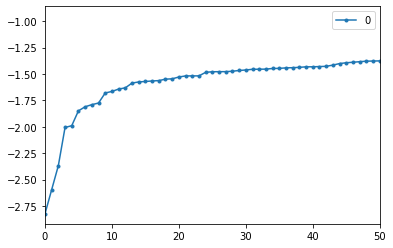

In [35]:
scores_local = pd.DataFrame(np.sort(df_scores_local))
scores_local.plot(stacked=True, xlim=[0, 50], style='.-')
plt.show()

In [36]:
th_local = np.sort(df_scores_local)[3]

In [37]:
th_local

-2.0071424876544617

In [38]:
drop_index = df_local[df_scores_local < th_local].index.tolist()

In [39]:
drop_index 

[13, 445, 579]

In [41]:
df.drop(drop_index , axis =0, inplace=True)

In [52]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


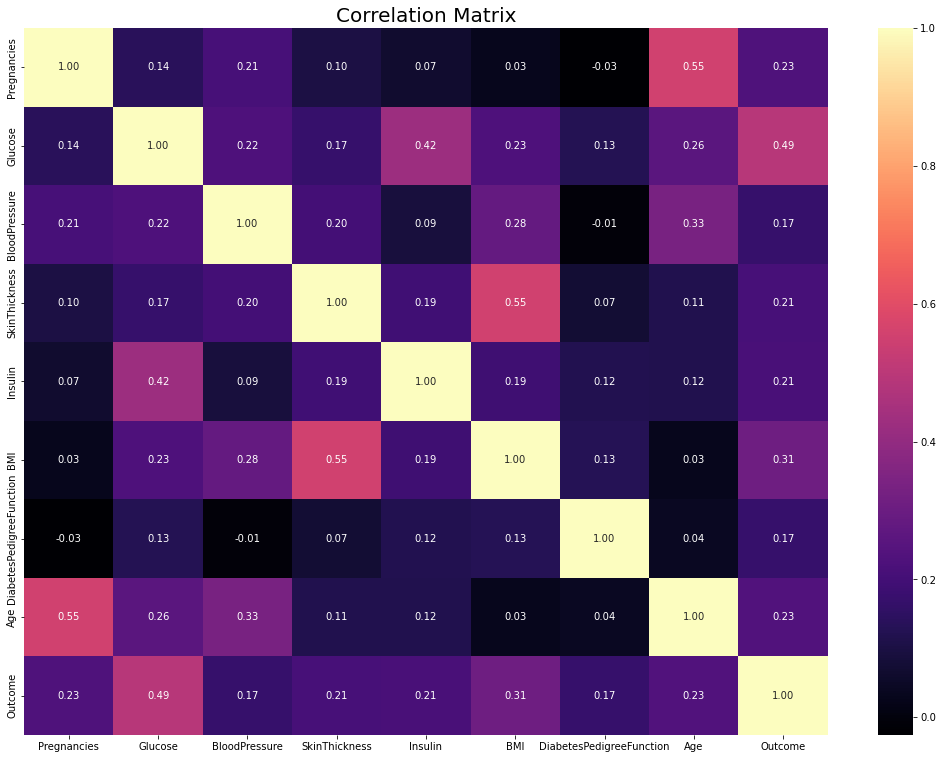

In [56]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()


In [61]:
df["AGE_CAT"] = pd.cut(x=df['Age'], bins=[df["Age"].min()-1, 50,df["Age"].max()+1] ,labels=["Mature", "Senior"])

In [65]:
df['NEW_BMI'] = pd.cut(x=df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100],labels=["Underweight", "Healthy", "Overweight", "Obese"])

In [74]:
df["AGE_BMI"] = df["AGE_CAT"].astype(str) + "_" + df['NEW_BMI'].astype(str)

In [75]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AGE_CAT,NEW_BMI,AGE_BMI
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,Mature,Obese,Mature_Obese
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,Mature,Overweight,Mature_Overweight
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,Mature,Healthy,Mature_Healthy
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,Mature,Overweight,Mature_Overweight
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,Mature,Obese,Mature_Obese
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0,Senior,Obese,Senior_Obese
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0,Mature,Obese,Mature_Obese
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0,Mature,Overweight,Mature_Overweight
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1,Mature,Obese,Mature_Obese


In [77]:
df.drop("Age", axis =1,inplace=True)

In [78]:
df.drop("AGE_CAT", axis =1,inplace=True)

In [79]:
df.drop("NEW_BMI", axis =1,inplace=True)

In [81]:
df.drop("BMI", axis =1,inplace=True)

In [83]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome,AGE_BMI
0,6,148.0,72.0,35.00000,155.548223,0.627,1,Mature_Obese
1,1,85.0,66.0,29.00000,155.548223,0.351,0,Mature_Overweight
2,8,183.0,64.0,29.15342,155.548223,0.672,1,Mature_Healthy
3,1,89.0,66.0,23.00000,94.000000,0.167,0,Mature_Overweight
4,0,137.0,40.0,35.00000,168.000000,2.288,1,Mature_Obese
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,0.171,0,Senior_Obese
764,2,122.0,70.0,27.00000,155.548223,0.340,0,Mature_Obese
765,5,121.0,72.0,23.00000,112.000000,0.245,0,Mature_Overweight
766,1,126.0,60.0,29.15342,155.548223,0.349,1,Mature_Obese


In [84]:
df.columns = [col.upper() for col in df.columns]

In [85]:
df

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,DIABETESPEDIGREEFUNCTION,OUTCOME,AGE_BMI
0,6,148.0,72.0,35.00000,155.548223,0.627,1,Mature_Obese
1,1,85.0,66.0,29.00000,155.548223,0.351,0,Mature_Overweight
2,8,183.0,64.0,29.15342,155.548223,0.672,1,Mature_Healthy
3,1,89.0,66.0,23.00000,94.000000,0.167,0,Mature_Overweight
4,0,137.0,40.0,35.00000,168.000000,2.288,1,Mature_Obese
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,0.171,0,Senior_Obese
764,2,122.0,70.0,27.00000,155.548223,0.340,0,Mature_Obese
765,5,121.0,72.0,23.00000,112.000000,0.245,0,Mature_Overweight
766,1,126.0,60.0,29.15342,155.548223,0.349,1,Mature_Obese


In [86]:
le = LabelEncoder()

In [87]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [88]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

In [89]:
binary_cols

['OUTCOME']

In [90]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [92]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 765
Variables: 8
cat_cols: 2
num_cols: 6
cat_but_car: 0
num_but_cat: 1


In [94]:
cat_cols = [col for col in cat_cols if col != "OUTCOME"]

In [95]:
cat_cols

['AGE_BMI']

In [96]:
df = one_hot_encoder(df, cat_cols)

In [97]:
df

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,DIABETESPEDIGREEFUNCTION,OUTCOME,AGE_BMI_Mature_Obese,AGE_BMI_Mature_Overweight,AGE_BMI_Mature_Underweight,AGE_BMI_Senior_Healthy,AGE_BMI_Senior_Obese,AGE_BMI_Senior_Overweight
0,6,148.0,72.0,35.00000,155.548223,0.627,1,1,0,0,0,0,0
1,1,85.0,66.0,29.00000,155.548223,0.351,0,0,1,0,0,0,0
2,8,183.0,64.0,29.15342,155.548223,0.672,1,0,0,0,0,0,0
3,1,89.0,66.0,23.00000,94.000000,0.167,0,0,1,0,0,0,0
4,0,137.0,40.0,35.00000,168.000000,2.288,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,0.171,0,0,0,0,0,1,0
764,2,122.0,70.0,27.00000,155.548223,0.340,0,1,0,0,0,0,0
765,5,121.0,72.0,23.00000,112.000000,0.245,0,0,1,0,0,0,0
766,1,126.0,60.0,29.15342,155.548223,0.349,1,1,0,0,0,0,0


In [104]:
for col in num_cols:
    ss = StandardScaler()
    df[col] = ss.fit_transform(df[[col]])
    

In [105]:
df

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,DIABETESPEDIGREEFUNCTION,OUTCOME,AGE_BMI_Mature_Obese,AGE_BMI_Mature_Overweight,AGE_BMI_Mature_Underweight,AGE_BMI_Senior_Healthy,AGE_BMI_Senior_Obese,AGE_BMI_Senior_Overweight
0,0.636354,0.880539,-0.034477,0.716386,0.008834,0.486521,1,1,0,0,0,0,0
1,-0.847825,-1.206839,-0.530269,-0.003108,0.008834,-0.364922,0,0,1,0,0,0,0
2,1.230025,2.040193,-0.695534,0.015290,0.008834,0.625343,1,0,0,0,0,0,0
3,-0.847825,-1.074307,-0.530269,-0.722601,-0.748910,-0.932550,0,0,1,0,0,0,0
4,-1.144661,0.516076,-2.678704,0.716386,0.162132,5.610602,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1.823697,-0.676711,0.296052,2.275288,0.309869,-0.920211,0,0,0,0,0,1,0
764,-0.550989,0.019081,-0.199741,-0.242939,0.008834,-0.398856,0,1,0,0,0,0,0
765,0.339518,-0.014052,-0.034477,-0.722601,-0.527305,-0.691925,0,0,1,0,0,0,0
766,-0.847825,0.151613,-1.026062,0.015290,0.008834,-0.371092,1,1,0,0,0,0,0


In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action="ignore")


In [113]:
y = df["OUTCOME"]
X = df.drop("OUTCOME", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

rf_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")


Accuracy: 0.77
Recall: 0.6
Precision: 0.6
F1: 0.6
Auc: 0.72


       Value                     Feature
1   0.286656                     GLUCOSE
5   0.161399    DIABETESPEDIGREEFUNCTION
3   0.125334               SKINTHICKNESS
2   0.119655               BLOODPRESSURE
0   0.112368                 PREGNANCIES
4   0.112182                     INSULIN
6   0.032947        AGE_BMI_Mature_Obese
7   0.015580   AGE_BMI_Mature_Overweight
10  0.014395        AGE_BMI_Senior_Obese
11  0.014309   AGE_BMI_Senior_Overweight
9   0.005169      AGE_BMI_Senior_Healthy
8   0.000006  AGE_BMI_Mature_Underweight


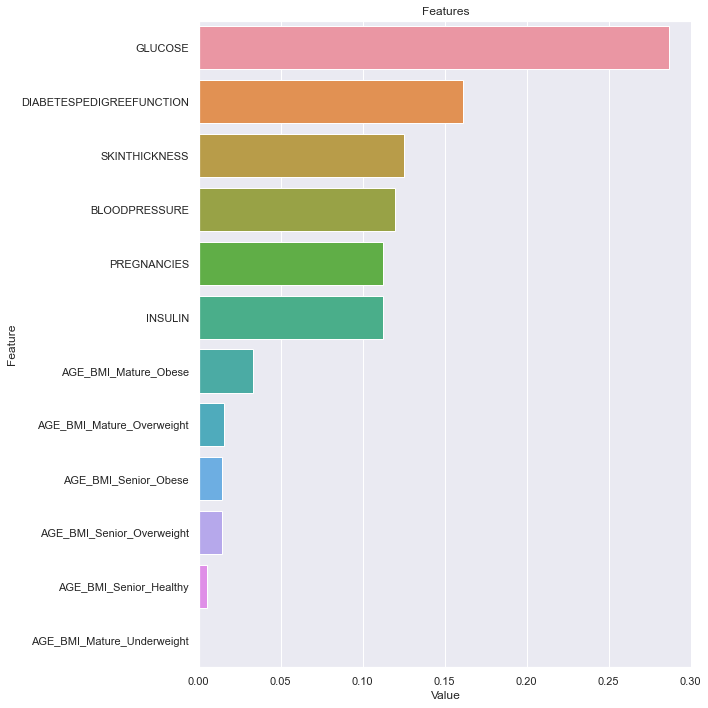

In [114]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values("Value",ascending=False))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X)

